In [262]:
import pandas as pd
import numpy as np
import torch
from tqdm import tqdm

In [13]:
sc1 = pd.read_csv('104/Scenario1.csv')

In [82]:
sc1

,yield [thousands of bushels],price [$/bushel]
0,213.45,4.418
1,247.56,6.063
2,212.81,6.224
3,250.25,7.117
4,255.31,7.632
...,...,...
995,246.38,4.579
996,253.58,6.767
997,242.81,6.918
998,259.14,6.701


In [166]:
sc1['total'] = sc1['yield [thousands of bushels]'] * sc1['price [$/bushel]'] * 1000

In [169]:
sc1['price [$/bushel]'].mean()

6.472742

In [170]:
sc1['yield [thousands of bushels]'].mean()

244.66335999999998

In [171]:
sc1['total'].mean()

1583350.8263000003

<Axes: ylabel='Frequency'>

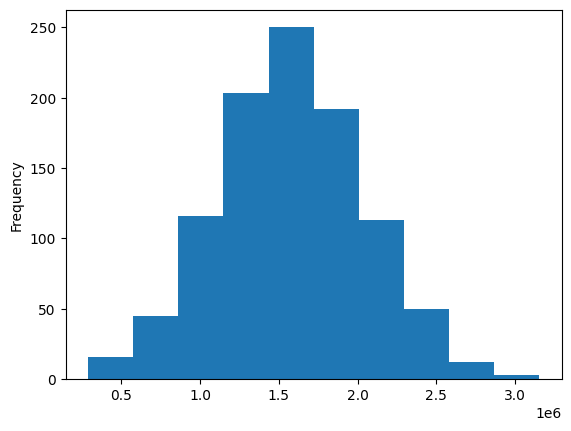

In [173]:
sc1['total'].plot.hist()

In [175]:
np.quantile(sc1['total'].to_numpy(),0.1)

990274.023

In [176]:
np.quantile(sc1['total'].to_numpy(),0.25)

1277795.5724999998

<Axes: ylabel='Frequency'>

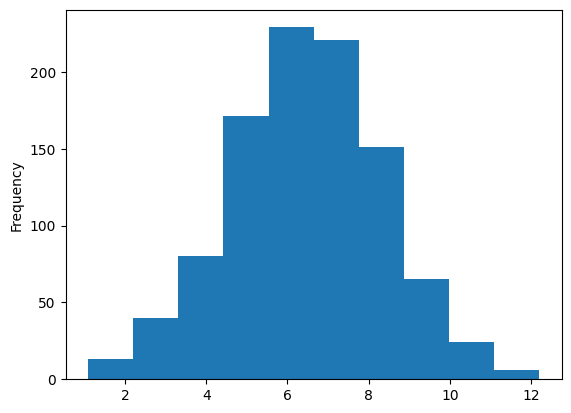

In [17]:
sc1['price [$/bushel]'].plot.hist()

<Axes: ylabel='Frequency'>

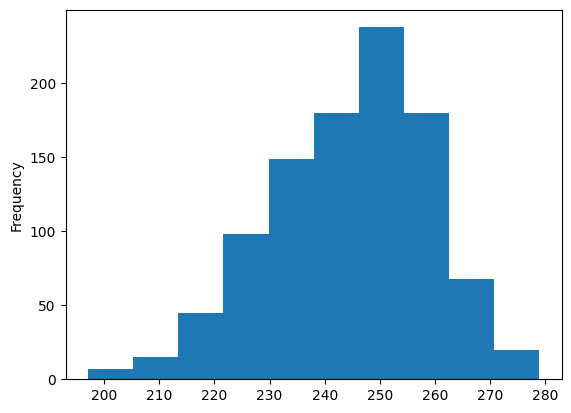

In [18]:
sc1['yield [thousands of bushels]'].plot.hist()

In [21]:
prices = pd.read_csv('104/option_prices_scenario_1.csv')

In [22]:
prices

,Option,Price [USD]
0,P5.0,25.2238
1,P5.5,39.0247
2,P6.0,58.2731
3,P6.5,83.5176
4,P7.0,114.0995
5,P7.5,150.2399
6,P8.0,191.7095
7,C5.0,187.2254
8,C5.5,146.0263
9,C6.0,110.2747


In [64]:
prices_list = prices['Price [USD]'].to_listst()

In [65]:
prices_list

[25.2238,
 39.0247,
 58.2731,
 83.5176,
 114.0995,
 150.2399,
 191.7095,
 187.2254,
 146.0263,
 110.2747,
 80.5192,
 56.1011,
 37.2415,
 23.7112]

In [49]:
options = {
    0:(5.0,'put'),
    1:(5.5,'put'),
    2:(6.0,'put'),
    3:(6.5,'put'),
    4:(7.0,'put'),
    5:(7.5,'put'),
    6:(8.0,'put'),
    7:(5.0,'call'),
    8:(5.5,'call'),
    9:(6.0,'call'),
    10:(6.5,'call'),
    11:(7.0,'call'),
    12:(7.5,'call'),
    13:(8.0,'call'),
}

In [50]:
example_startegy = list(range(14))

In [51]:
example_startegy

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]

### Calculates the profit of a strategy

In [92]:
def calculate_profit(K, S, typ, A=100):
  ### K   -> option price (strike)
  ### S   -> market price
  ### typ -> put/call
  ### A   -> no of bushels

#   print(f"type : {typ}")
  value = None
  if typ == "put":
    value = A * (K - S)
  elif typ == "call":
    value = A * (S - K)
  else:
    print("I don't know this type")

  if value < 0:
    value = 0
#     print("Value : -0")
#   else:
#     print(f"Value : {value}")

  return value

    

In [59]:
profit(prices, sc1['yield [thousands of bushels]'].iloc[0], sc1['price [$/bushel]'].iloc[0], example_startegy)

Income from selling is: 943022.1
5.0 put
type : put
Value : 58.19999999999999
5.5 put
type : put
Value : 108.19999999999999
6.0 put
type : put
Value : 158.2
6.5 put
type : put
Value : 208.2
7.0 put
type : put
Value : 258.2
7.5 put
type : put
Value : 308.2
8.0 put
type : put
Value : 358.2
5.0 call
type : call
Value : -0
5.5 call
type : call
Value : -0
6.0 call
type : call
Value : -0
6.5 call
type : call
Value : -0
7.0 call
type : call
Value : -0
7.5 call
type : call
Value : -0
8.0 call
type : call
Value : -0


940381.6135999999

In [60]:
sc1['yield [thousands of bushels]'].iloc[0]

213.45

In [61]:
sc1['price [$/bushel]'].iloc[0]

4.418

In [63]:
sc1.mean()

yield [thousands of bushels]    244.663360
price [$/bushel]                  6.472742
dtype: float64

In [93]:
def expected_profit_on_option(strike, typ, expected_market_price, option_price):
    return calculate_profit(strike, expected_market_price, typ) - option_price

In [72]:
result = []
for i in range(14):
    strike, typ = options[i]
    exp = expected_profit_on_option(strike, typ, 6.472742, prices_list[i])
    result.append([strike, typ, exp])

type : put
Value : -0
type : put
Value : -0
type : put
Value : -0
type : put
Value : 2.7257999999999782
type : put
Value : 52.72579999999998
type : put
Value : 102.72579999999998
type : put
Value : 152.7258
type : call
Value : 147.2742
type : call
Value : 97.27420000000002
type : call
Value : 47.27420000000002
type : call
Value : -0
type : call
Value : -0
type : call
Value : -0
type : call
Value : -0


In [73]:
result

[[5.0, 'put', -25.2238],
 [5.5, 'put', -39.0247],
 [6.0, 'put', -58.2731],
 [6.5, 'put', -80.79180000000002],
 [7.0, 'put', -61.37370000000003],
 [7.5, 'put', -47.51410000000003],
 [8.0, 'put', -38.9837],
 [5.0, 'call', -39.9512],
 [5.5, 'call', -48.75209999999997],
 [6.0, 'call', -63.000499999999974],
 [6.5, 'call', -80.5192],
 [7.0, 'call', -56.1011],
 [7.5, 'call', -37.2415],
 [8.0, 'call', -23.7112]]

In [75]:
np.random.randint(100, size=14)

array([72, 48, 32,  7, 44, 87, 89, 68, 79, 10, 73,  3, 55, 84])

In [81]:
sc1_list = sc1.to_dict(orient='list')

In [110]:
sc1_list

{'yield [thousands of bushels]': [213.45,
  247.56,
  212.81,
  250.25,
  255.31,
  264.79,
  256.31,
  220.02,
  251.72,
  245.41,
  249.55,
  273.29,
  225.35,
  247.31,
  250.56,
  255.87,
  222.91,
  259.77,
  252.4,
  254.28,
  245.24,
  245.36,
  256.64,
  255.26,
  243.56,
  259.78,
  264.43,
  259.25,
  269.9,
  233.48,
  261.62,
  258.92,
  229.22,
  264.03,
  227.16,
  261.81,
  246.89,
  231.08,
  248.62,
  209.88,
  241.22,
  270.76,
  220.65,
  240.73,
  247.17,
  253.81,
  251.89,
  244.41,
  251.63,
  258.71,
  227.18,
  268.45,
  260.55,
  233.9,
  226.98,
  237.46,
  259.4,
  226.02,
  235.57,
  245.94,
  255.84,
  253.28,
  224.91,
  266.26,
  237.28,
  247.18,
  262.1,
  230.67,
  253.07,
  225.16,
  237.28,
  246.74,
  241.95,
  256.74,
  250.38,
  234.69,
  224.35,
  228.53,
  245.01,
  257.21,
  257.6,
  249.64,
  220.22,
  221.31,
  237.07,
  245.68,
  233.91,
  242.2,
  245.79,
  242.14,
  222.87,
  272.84,
  254.94,
  248.87,
  236.11,
  213.0,
  252.53,
  254.

### Random solution

In [291]:
number_of_random_strategies = 100000
best_profit = 0
best_quantile_10 = 0
min_quantile_10 = 1320000
min_quantile_25 = 1400000
best_strat = []
for i in tqdm(range(number_of_random_strategies)):
#     strat = np.random.randint(100, size=14)
    strat = np.hstack((np.random.randint(2000, size=7), np.zeros(7)))
#     strat = [1000, 1000, 1000, 100, 1000, 100, 0, 0, 0, 0, 0, 0, 0, 0]
    curr_profits = []
    for j in range(1000):
        curr_strat_profit = profit(prices_list, sc1_list['yield [thousands of bushels]'][j], sc1_list['price [$/bushel]'][j], strat)
#         print(curr_strat_profit)
#         print(sc1_list['yield [thousands of bushels]'][j])
#         print(sc1_list['price [$/bushel]'][j])
        curr_profits.append(curr_strat_profit)
    curr_expectet_profit = np.mean(curr_profits)
    quantile_10 = np.quantile(curr_profits, 0.1)
    quantile_25 = np.quantile(curr_profits, 0.25)
    if curr_expectet_profit > best_profit and quantile_10 > min_quantile_10 and quantile_25 > min_quantile_25:
        best_profit = curr_expectet_profit
        best_strat = strat
#         print(quantile_10)
#         print(quantile_25)
        print('New best strategy at iteration ',i,' : ', strat, 'Expected Profit:', curr_expectet_profit)

  0%|                                                                             | 120/100000 [00:01<17:28, 95.30it/s]

New best strategy at iteration  105  :  [1356.   39.  712.  182.  422.  699.  392.    0.    0.    0.    0.    0.
    0.    0.] Expected Profit: 1554193.1197999998


  1%|▉                                                                           | 1177/100000 [00:12<19:29, 84.49it/s]

New best strategy at iteration  1167  :  [  59. 1218.  592.   31.  567.  809.  179.    0.    0.    0.    0.    0.
    0.    0.] Expected Profit: 1555472.4534999998


  1%|▉                                                                           | 1303/100000 [00:13<17:53, 91.98it/s]

New best strategy at iteration  1280  :  [883. 472.   5. 114. 969. 425. 349.   0.   0.   0.   0.   0.   0.   0.] Expected Profit: 1556821.1833999995


  6%|████▎                                                                       | 5741/100000 [01:01<16:28, 95.31it/s]

New best strategy at iteration  5726  :  [ 360.  881.    9.  208. 1495.  155.  135.    0.    0.    0.    0.    0.
    0.    0.] Expected Profit: 1557795.8672


  7%|█████                                                                       | 6711/100000 [01:11<16:15, 95.63it/s]

New best strategy at iteration  6698  :  [ 211.   19. 1078.  610.  353.  490.  220.    0.    0.    0.    0.    0.
    0.    0.] Expected Profit: 1558269.075


 10%|███████▎                                                                    | 9631/100000 [01:43<15:56, 94.47it/s]

New best strategy at iteration  9621  :  [ 537.  164.   36.  359. 1450.   24.  212.    0.    0.    0.    0.    0.
    0.    0.] Expected Profit: 1559558.2186999999


 25%|██████████████████▌                                                        | 24712/100000 [04:30<13:24, 93.61it/s]

New best strategy at iteration  24698  :  [ 682.   52.  157.  243. 1362.  255.   94.    0.    0.    0.    0.    0.
    0.    0.] Expected Profit: 1559677.0511999999


 38%|████████████████████████████▎                                              | 37798/100000 [06:54<11:22, 91.12it/s]


KeyboardInterrupt: 

In [ ]:
New best strategy at iteration  24698  :  [ 682.   52.  157.  243. 1362.  255.   94.    0.    0.    0.    0.    0.
    0.    0.] Expected Profit: 1559677.0511999999

In [292]:
best_profit

1559677.0511999999

In [293]:
best_strat

array([ 682.,   52.,  157.,  243., 1362.,  255.,   94.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.])

In [294]:
def get_expected_value_of_strategy(strategy, market_prices, yields, option_prices):
    profits = []
    for i in range(1000):
        curr_profit = profit(option_prices, yields[i], market_prices[i], strategy)
        profits.append(curr_profit)
    expected_profit = np.mean(profits)
    quantile_10 = np.quantile(profits, 0.1)
    quantile_25 = np.quantile(profits, 0.25)
    if quantile_10 > min_quantile_10 and quantile_25 > min_quantile_25:
        return expected_profit
    return 0

In [295]:
get_expected_value_of_strategy([ 256.,  136.,  337.,  622., 1221.,  201.,   78.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.], sc1_list['price [$/bushel]'], sc1_list['yield [thousands of bushels]'], prices_list)

1559003.7226000002

In [301]:
import copy

In [323]:
def get_similar_strategies(strat):
    ret = []
    for i in range(14):
        temp1 = copy.deepcopy(strat)
        temp2 = copy.deepcopy(strat)
        temp1[i] = strat[i] +1
        temp2[i] -= 1
        if np.min(temp1) >= 0:
            ret.append(temp1)
        if np.min(temp2) >= 0:
            ret.append(temp2)
    return ret

In [324]:
get_similar_strategies([ 682.,   52.,  157.,  243., 1362.,  255.,   94.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.])

[[683.0,
  52.0,
  157.0,
  243.0,
  1362.0,
  255.0,
  94.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 [681.0,
  52.0,
  157.0,
  243.0,
  1362.0,
  255.0,
  94.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 [682.0,
  53.0,
  157.0,
  243.0,
  1362.0,
  255.0,
  94.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 [682.0,
  51.0,
  157.0,
  243.0,
  1362.0,
  255.0,
  94.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 [682.0,
  52.0,
  158.0,
  243.0,
  1362.0,
  255.0,
  94.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 [682.0,
  52.0,
  156.0,
  243.0,
  1362.0,
  255.0,
  94.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 [682.0,
  52.0,
  157.0,
  244.0,
  1362.0,
  255.0,
  94.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 [682.0,
  52.0,
  157.0,
  242.0,
  1362.0,
  255.0,
  94.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 [682.0,
  52.0,
  157.0,
  243.0,
  1363.0,
  255.0,
  94.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,


### Ascent

In [327]:
number_of_random_strategies = 10000
# best_profit = 0
best_quantile_10 = 0
min_quantile_10 = 1320000
min_quantile_25 = 1400000
curr_strat = [ 256.,  136.,  337.,  622., 1221.,  201.,   78.,    0.,    0.,  0.,    0.,    0.,    0.,    0.]
best_expected_profit = 0
prev_best = -1
for i in tqdm(range(number_of_random_strategies)):
    prev_best = best_expected_profit
    curr_profits = []
    similar_strategies = get_similar_strategies(curr_strat)
    for strat in similar_strategies:
        curr_strat_expected_profit = get_expected_value_of_strategy(strat, sc1_list['price [$/bushel]'], sc1_list['yield [thousands of bushels]'], prices_list)
        if curr_strat_expected_profit > best_expected_profit:
            best_expected_profit = curr_strat_expected_profit
            curr_strat = strat
#             print('New best strategy at iteration ',i,' : ', strat, 'Expected Profit:', curr_strat_expected_profit)
    if prev_best == best_expected_profit:
        if best_expected_profit != 0:
            print('Start:', curr_strat, "Expected Profit: ", best_expected_profit)
        curr_strat = np.hstack((np.random.randint(2000, size=7), np.zeros(7)))
        best_expected_profit = 0

  1%|▊                                                                             | 105/10000 [00:12<21:34,  7.64it/s]

Start: [256.0, 136.0, 332.0, 622.0, 1221.0, 180.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] Expected Profit:  1560676.4246000005


  7%|█████▌                                                                        | 717/10000 [02:24<33:00,  4.69it/s]

Start: [622. 117.  68. 726. 889. 292. 168.   0.   0.   0.   0.   0.   0.   0.] Expected Profit:  1559499.5999


 15%|███████████▍                                                                 | 1483/10000 [05:08<32:15,  4.40it/s]

Start: [ 115.  539.  565. 1086.   32.  509.  195.    0.    0.    0.    0.    0.
    0.    0.] Expected Profit:  1559253.8808


 23%|█████████████████▍                                                           | 2266/10000 [08:00<28:46,  4.48it/s]

Start: [201.  12. 466. 874.  93. 197. 651.   0.   0.   0.   0.   0.   0.   0.] Expected Profit:  1558741.7946


 34%|██████████████████████████▍                                                  | 3439/10000 [12:17<23:42,  4.61it/s]

Start: [477.  29. 766. 506. 309. 320. 458.   0.   0.   0.   0.   0.   0.   0.] Expected Profit:  1558696.5096000002


 40%|███████████████████████████████                                              | 4026/10000 [14:26<21:25,  4.65it/s]

Start: [144. 129. 629. 304. 542. 502. 293.   0.   0.   0.   0.   0.   0.   0.] Expected Profit:  1559337.8031


 48%|████████████████████████████████████▋                                        | 4771/10000 [17:11<20:22,  4.28it/s]

Start: [  26. 1284.  351.   17.  191.  444.  628.    0.    0.    0.    0.    0.
    0.    0.] Expected Profit:  1557757.1555


 56%|███████████████████████████████████████████▍                                 | 5649/10000 [20:20<16:36,  4.37it/s]

Start: [581. 814. 756.  63.  10. 270. 821.   0.   0.   0.   0.   0.   0.   0.] Expected Profit:  1556547.4832000001


 68%|████████████████████████████████████████████████████▏                        | 6775/10000 [24:25<13:42,  3.92it/s]

Start: [544. 287. 274. 518. 370. 812.  97.   0.   0.   0.   0.   0.   0.   0.] Expected Profit:  1559081.8495


 68%|████████████████████████████████████████████████████▋                        | 6839/10000 [24:38<11:10,  4.71it/s]

Start: [926. 236. 310. 704. 704. 554.  70.   0.   0.   0.   0.   0.   0.   0.] Expected Profit:  1557313.7919


 75%|██████████████████████████████████████████████████████████▏                  | 7549/10000 [27:18<09:07,  4.48it/s]

Start: [454. 950.  20. 740. 546.   7. 546.   0.   0.   0.   0.   0.   0.   0.] Expected Profit:  1557940.1977


 82%|███████████████████████████████████████████████████████████████▏             | 8214/10000 [29:46<06:31,  4.56it/s]

Start: [1245.  279.  276.   61. 1021.  141.  505.    0.    0.    0.    0.    0.
    0.    0.] Expected Profit:  1556263.305


 92%|██████████████████████████████████████████████████████████████████████▊      | 9201/10000 [33:28<03:11,  4.18it/s]

Start: [ 67. 705. 182. 245. 362. 123. 849.   0.   0.   0.   0.   0.   0.   0.] Expected Profit:  1557640.4015


 93%|███████████████████████████████████████████████████████████████████████▋     | 9313/10000 [33:53<02:34,  4.45it/s]

Start: [ 98. 287.  64. 986. 591. 423. 128.   0.   0.   0.   0.   0.   0.   0.] Expected Profit:  1560144.1801


100%|████████████████████████████████████████████████████████████████████████████| 10000/10000 [36:29<00:00,  4.57it/s]


In [ ]:
New best strategy at iteration  103  :  [256.0, 136.0, 332.0, 622.0, 1221.0, 180.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] Expected Profit: 1560676.4246000005

In [164]:
def profit_all(option_prices, yi, market_price, strategy):
    profits = []
    for i in range(1000):
        current_profit = profit(option_prices, yi[i], market_price[i], strategy)
        profits.append(current_profit)
    quantile_10 = np.quantile(curr_profits, 0.1)
    quantile_25 = np.quantile(curr_profits, 0.25)
    if quantile_10 < min_quantile_10 or quantile_25 < min_quantile_25:
        return torch.tensor(0)
    return torch.tensor(np.mean(profits))

In [227]:
def calculate_profit(strike, market_price, typ):
    if typ == 'call':
        return max(100 * (market_price - strike), 0.0)
#     print(strike, market_price)
    return max(100 * (strike - market_price), 0.0)

In [219]:
def profit(option_prices, yi, market_price, strategy):
    res = yi * market_price * 1000
    before_options = res
#     print('Income from selling is:', res)
    for i in range(14):
        strike, typ = options[i]
#         print(strike, typ)
        res += strategy[i] * calculate_profit(strike, market_price, typ)
        res -= option_prices[i] * strategy[i]
#     if res-before_options > 0:
#         print(res-before_options, strategy)
#     print("profit on options:", res-before_options)
    return res

In [141]:
# Define the input variables
option_prices = prices
yi = sc1_list['yield [thousands of bushels]']
market_price = sc1_list['price [$/bushel]']
strategy = [56.0, 91.0, 28.0, 39.0, 41.0, 39.0, 29.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

# Convert the input variables to PyTorch tensors
option_prices = torch.tensor(option_prices['Price [USD]'], requires_grad=False)
yi = torch.tensor(yi, requires_grad=False)
market_price = torch.tensor(market_price, requires_grad=False)
strategy = torch.tensor(strategy, requires_grad=True)

In [165]:
# Calculate the function value
output = profit_all(option_prices, yi, market_price, strategy)

# Calculate the derivative of the function with respect to the market price variable
output.backward(retain_graph=True)
grad = strategy.grad

# Use gradient ascent to find the maximum point
learning_rate = 0.01
num_iterations = 100
current_point = market_price
for i in range(num_iterations):
    current_point += learning_rate * grad
    output = profit(option_prices, yi, current_point, strategy)
    output.backward(retain_graph=True)
    grad = market_price.grad
    print('Iteration {}: market price = {}, profit = {}'.format(i+1, current_point, output))

# The final value of current_point should be the maximum point


5.0 tensor(4.4180)
5.5 tensor(4.4180)
6.0 tensor(4.4180)
6.5 tensor(4.4180)
7.0 tensor(4.4180)
7.5 tensor(4.4180)
8.0 tensor(4.4180)
5.0 tensor(6.0630)
5.5 tensor(6.0630)
6.0 tensor(6.0630)
6.5 tensor(6.0630)
7.0 tensor(6.0630)
7.5 tensor(6.0630)
8.0 tensor(6.0630)
5.0 tensor(6.2240)
5.5 tensor(6.2240)
6.0 tensor(6.2240)
6.5 tensor(6.2240)
7.0 tensor(6.2240)
7.5 tensor(6.2240)
8.0 tensor(6.2240)
5.0 tensor(7.1170)
5.5 tensor(7.1170)
6.0 tensor(7.1170)
6.5 tensor(7.1170)
7.0 tensor(7.1170)
7.5 tensor(7.1170)
8.0 tensor(7.1170)
5.0 tensor(7.6320)
5.5 tensor(7.6320)
6.0 tensor(7.6320)
6.5 tensor(7.6320)
7.0 tensor(7.6320)
7.5 tensor(7.6320)
8.0 tensor(7.6320)
5.0 tensor(1.0930)
5.5 tensor(1.0930)
6.0 tensor(1.0930)
6.5 tensor(1.0930)
7.0 tensor(1.0930)
7.5 tensor(1.0930)
8.0 tensor(1.0930)
5.0 tensor(4.1300)
5.5 tensor(4.1300)
6.0 tensor(4.1300)
6.5 tensor(4.1300)
7.0 tensor(4.1300)
7.5 tensor(4.1300)
8.0 tensor(4.1300)
5.0 tensor(7.9180)
5.5 tensor(7.9180)
6.0 tensor(7.9180)
6.5 tensor(7

5.0 tensor(8.4120)
5.5 tensor(8.4120)
6.0 tensor(8.4120)
6.5 tensor(8.4120)
7.0 tensor(8.4120)
7.5 tensor(8.4120)
8.0 tensor(8.4120)
5.0 tensor(11.0420)
5.5 tensor(11.0420)
6.0 tensor(11.0420)
6.5 tensor(11.0420)
7.0 tensor(11.0420)
7.5 tensor(11.0420)
8.0 tensor(11.0420)
5.0 tensor(9.3630)
5.5 tensor(9.3630)
6.0 tensor(9.3630)
6.5 tensor(9.3630)
7.0 tensor(9.3630)
7.5 tensor(9.3630)
8.0 tensor(9.3630)
5.0 tensor(5.2640)
5.5 tensor(5.2640)
6.0 tensor(5.2640)
6.5 tensor(5.2640)
7.0 tensor(5.2640)
7.5 tensor(5.2640)
8.0 tensor(5.2640)
5.0 tensor(6.6860)
5.5 tensor(6.6860)
6.0 tensor(6.6860)
6.5 tensor(6.6860)
7.0 tensor(6.6860)
7.5 tensor(6.6860)
8.0 tensor(6.6860)
5.0 tensor(5.2570)
5.5 tensor(5.2570)
6.0 tensor(5.2570)
6.5 tensor(5.2570)
7.0 tensor(5.2570)
7.5 tensor(5.2570)
8.0 tensor(5.2570)
5.0 tensor(7.1950)
5.5 tensor(7.1950)
6.0 tensor(7.1950)
6.5 tensor(7.1950)
7.0 tensor(7.1950)
7.5 tensor(7.1950)
8.0 tensor(7.1950)
5.0 tensor(9.2990)
5.5 tensor(9.2990)
6.0 tensor(9.2990)
6.5 t

5.0 tensor(8.9780)
5.5 tensor(8.9780)
6.0 tensor(8.9780)
6.5 tensor(8.9780)
7.0 tensor(8.9780)
7.5 tensor(8.9780)
8.0 tensor(8.9780)
5.0 tensor(3.1560)
5.5 tensor(3.1560)
6.0 tensor(3.1560)
6.5 tensor(3.1560)
7.0 tensor(3.1560)
7.5 tensor(3.1560)
8.0 tensor(3.1560)
5.0 tensor(9.2570)
5.5 tensor(9.2570)
6.0 tensor(9.2570)
6.5 tensor(9.2570)
7.0 tensor(9.2570)
7.5 tensor(9.2570)
8.0 tensor(9.2570)
5.0 tensor(4.9030)
5.5 tensor(4.9030)
6.0 tensor(4.9030)
6.5 tensor(4.9030)
7.0 tensor(4.9030)
7.5 tensor(4.9030)
8.0 tensor(4.9030)
5.0 tensor(4.1210)
5.5 tensor(4.1210)
6.0 tensor(4.1210)
6.5 tensor(4.1210)
7.0 tensor(4.1210)
7.5 tensor(4.1210)
8.0 tensor(4.1210)
5.0 tensor(7.1360)
5.5 tensor(7.1360)
6.0 tensor(7.1360)
6.5 tensor(7.1360)
7.0 tensor(7.1360)
7.5 tensor(7.1360)
8.0 tensor(7.1360)
5.0 tensor(4.9140)
5.5 tensor(4.9140)
6.0 tensor(4.9140)
6.5 tensor(4.9140)
7.0 tensor(4.9140)
7.5 tensor(4.9140)
8.0 tensor(4.9140)
5.0 tensor(3.7860)
5.5 tensor(3.7860)
6.0 tensor(3.7860)
6.5 tensor(3

5.0 tensor(4.8010)
5.5 tensor(4.8010)
6.0 tensor(4.8010)
6.5 tensor(4.8010)
7.0 tensor(4.8010)
7.5 tensor(4.8010)
8.0 tensor(4.8010)
5.0 tensor(7.8830)
5.5 tensor(7.8830)
6.0 tensor(7.8830)
6.5 tensor(7.8830)
7.0 tensor(7.8830)
7.5 tensor(7.8830)
8.0 tensor(7.8830)
5.0 tensor(4.9870)
5.5 tensor(4.9870)
6.0 tensor(4.9870)
6.5 tensor(4.9870)
7.0 tensor(4.9870)
7.5 tensor(4.9870)
8.0 tensor(4.9870)
5.0 tensor(7.5310)
5.5 tensor(7.5310)
6.0 tensor(7.5310)
6.5 tensor(7.5310)
7.0 tensor(7.5310)
7.5 tensor(7.5310)
8.0 tensor(7.5310)
5.0 tensor(7.9090)
5.5 tensor(7.9090)
6.0 tensor(7.9090)
6.5 tensor(7.9090)
7.0 tensor(7.9090)
7.5 tensor(7.9090)
8.0 tensor(7.9090)
5.0 tensor(5.5370)
5.5 tensor(5.5370)
6.0 tensor(5.5370)
6.5 tensor(5.5370)
7.0 tensor(5.5370)
7.5 tensor(5.5370)
8.0 tensor(5.5370)
5.0 tensor(4.5650)
5.5 tensor(4.5650)
6.0 tensor(4.5650)
6.5 tensor(4.5650)
7.0 tensor(4.5650)
7.5 tensor(4.5650)
8.0 tensor(4.5650)
5.0 tensor(4.1650)
5.5 tensor(4.1650)
6.0 tensor(4.1650)
6.5 tensor(4

8.0 tensor(5.5420)
5.0 tensor(6.3910)
5.5 tensor(6.3910)
6.0 tensor(6.3910)
6.5 tensor(6.3910)
7.0 tensor(6.3910)
7.5 tensor(6.3910)
8.0 tensor(6.3910)
5.0 tensor(7.5760)
5.5 tensor(7.5760)
6.0 tensor(7.5760)
6.5 tensor(7.5760)
7.0 tensor(7.5760)
7.5 tensor(7.5760)
8.0 tensor(7.5760)
5.0 tensor(5.1750)
5.5 tensor(5.1750)
6.0 tensor(5.1750)
6.5 tensor(5.1750)
7.0 tensor(5.1750)
7.5 tensor(5.1750)
8.0 tensor(5.1750)
5.0 tensor(6.2410)
5.5 tensor(6.2410)
6.0 tensor(6.2410)
6.5 tensor(6.2410)
7.0 tensor(6.2410)
7.5 tensor(6.2410)
8.0 tensor(6.2410)
5.0 tensor(8.1040)
5.5 tensor(8.1040)
6.0 tensor(8.1040)
6.5 tensor(8.1040)
7.0 tensor(8.1040)
7.5 tensor(8.1040)
8.0 tensor(8.1040)
5.0 tensor(5.3870)
5.5 tensor(5.3870)
6.0 tensor(5.3870)
6.5 tensor(5.3870)
7.0 tensor(5.3870)
7.5 tensor(5.3870)
8.0 tensor(5.3870)
5.0 tensor(7.2590)
5.5 tensor(7.2590)
6.0 tensor(7.2590)
6.5 tensor(7.2590)
7.0 tensor(7.2590)
7.5 tensor(7.2590)
8.0 tensor(7.2590)
5.0 tensor(8.0610)
5.5 tensor(8.0610)
6.0 tensor(8

5.0 tensor(6.4630)
5.5 tensor(6.4630)
6.0 tensor(6.4630)
6.5 tensor(6.4630)
7.0 tensor(6.4630)
7.5 tensor(6.4630)
8.0 tensor(6.4630)
5.0 tensor(5.8100)
5.5 tensor(5.8100)
6.0 tensor(5.8100)
6.5 tensor(5.8100)
7.0 tensor(5.8100)
7.5 tensor(5.8100)
8.0 tensor(5.8100)
5.0 tensor(6.7740)
5.5 tensor(6.7740)
6.0 tensor(6.7740)
6.5 tensor(6.7740)
7.0 tensor(6.7740)
7.5 tensor(6.7740)
8.0 tensor(6.7740)
5.0 tensor(4.9600)
5.5 tensor(4.9600)
6.0 tensor(4.9600)
6.5 tensor(4.9600)
7.0 tensor(4.9600)
7.5 tensor(4.9600)
8.0 tensor(4.9600)
5.0 tensor(8.6320)
5.5 tensor(8.6320)
6.0 tensor(8.6320)
6.5 tensor(8.6320)
7.0 tensor(8.6320)
7.5 tensor(8.6320)
8.0 tensor(8.6320)
5.0 tensor(7.1580)
5.5 tensor(7.1580)
6.0 tensor(7.1580)
6.5 tensor(7.1580)
7.0 tensor(7.1580)
7.5 tensor(7.1580)
8.0 tensor(7.1580)
5.0 tensor(8.0240)
5.5 tensor(8.0240)
6.0 tensor(8.0240)
6.5 tensor(8.0240)
7.0 tensor(8.0240)
7.5 tensor(8.0240)
8.0 tensor(8.0240)
5.0 tensor(4.8950)
5.5 tensor(4.8950)
6.0 tensor(4.8950)
6.5 tensor(4

5.0 tensor(6.9950)
5.5 tensor(6.9950)
6.0 tensor(6.9950)
6.5 tensor(6.9950)
7.0 tensor(6.9950)
7.5 tensor(6.9950)
8.0 tensor(6.9950)
5.0 tensor(8.3970)
5.5 tensor(8.3970)
6.0 tensor(8.3970)
6.5 tensor(8.3970)
7.0 tensor(8.3970)
7.5 tensor(8.3970)
8.0 tensor(8.3970)
5.0 tensor(10.1500)
5.5 tensor(10.1500)
6.0 tensor(10.1500)
6.5 tensor(10.1500)
7.0 tensor(10.1500)
7.5 tensor(10.1500)
8.0 tensor(10.1500)
5.0 tensor(4.2780)
5.5 tensor(4.2780)
6.0 tensor(4.2780)
6.5 tensor(4.2780)
7.0 tensor(4.2780)
7.5 tensor(4.2780)
8.0 tensor(4.2780)
5.0 tensor(7.0260)
5.5 tensor(7.0260)
6.0 tensor(7.0260)
6.5 tensor(7.0260)
7.0 tensor(7.0260)
7.5 tensor(7.0260)
8.0 tensor(7.0260)
5.0 tensor(5.7950)
5.5 tensor(5.7950)
6.0 tensor(5.7950)
6.5 tensor(5.7950)
7.0 tensor(5.7950)
7.5 tensor(5.7950)
8.0 tensor(5.7950)
5.0 tensor(6.2990)
5.5 tensor(6.2990)
6.0 tensor(6.2990)
6.5 tensor(6.2990)
7.0 tensor(6.2990)
7.5 tensor(6.2990)
8.0 tensor(6.2990)
5.0 tensor(7.1570)
5.5 tensor(7.1570)
6.0 tensor(7.1570)
6.5 t

5.0 tensor(6.1410)
5.5 tensor(6.1410)
6.0 tensor(6.1410)
6.5 tensor(6.1410)
7.0 tensor(6.1410)
7.5 tensor(6.1410)
8.0 tensor(6.1410)
5.0 tensor(4.5280)
5.5 tensor(4.5280)
6.0 tensor(4.5280)
6.5 tensor(4.5280)
7.0 tensor(4.5280)
7.5 tensor(4.5280)
8.0 tensor(4.5280)
5.0 tensor(5.5240)
5.5 tensor(5.5240)
6.0 tensor(5.5240)
6.5 tensor(5.5240)
7.0 tensor(5.5240)
7.5 tensor(5.5240)
8.0 tensor(5.5240)
5.0 tensor(5.3650)
5.5 tensor(5.3650)
6.0 tensor(5.3650)
6.5 tensor(5.3650)
7.0 tensor(5.3650)
7.5 tensor(5.3650)
8.0 tensor(5.3650)
5.0 tensor(7.4630)
5.5 tensor(7.4630)
6.0 tensor(7.4630)
6.5 tensor(7.4630)
7.0 tensor(7.4630)
7.5 tensor(7.4630)
8.0 tensor(7.4630)
5.0 tensor(8.8230)
5.5 tensor(8.8230)
6.0 tensor(8.8230)
6.5 tensor(8.8230)
7.0 tensor(8.8230)
7.5 tensor(8.8230)
8.0 tensor(8.8230)
5.0 tensor(2.7110)
5.5 tensor(2.7110)
6.0 tensor(2.7110)
6.5 tensor(2.7110)
7.0 tensor(2.7110)
7.5 tensor(2.7110)
8.0 tensor(2.7110)
5.0 tensor(4.8580)
5.5 tensor(4.8580)
6.0 tensor(4.8580)
6.5 tensor(4

7.5 tensor(9.4870)
8.0 tensor(9.4870)
5.0 tensor(10.4600)
5.5 tensor(10.4600)
6.0 tensor(10.4600)
6.5 tensor(10.4600)
7.0 tensor(10.4600)
7.5 tensor(10.4600)
8.0 tensor(10.4600)
5.0 tensor(5.9520)
5.5 tensor(5.9520)
6.0 tensor(5.9520)
6.5 tensor(5.9520)
7.0 tensor(5.9520)
7.5 tensor(5.9520)
8.0 tensor(5.9520)
5.0 tensor(6.4330)
5.5 tensor(6.4330)
6.0 tensor(6.4330)
6.5 tensor(6.4330)
7.0 tensor(6.4330)
7.5 tensor(6.4330)
8.0 tensor(6.4330)
5.0 tensor(5.1350)
5.5 tensor(5.1350)
6.0 tensor(5.1350)
6.5 tensor(5.1350)
7.0 tensor(5.1350)
7.5 tensor(5.1350)
8.0 tensor(5.1350)
5.0 tensor(6.5520)
5.5 tensor(6.5520)
6.0 tensor(6.5520)
6.5 tensor(6.5520)
7.0 tensor(6.5520)
7.5 tensor(6.5520)
8.0 tensor(6.5520)
5.0 tensor(6.1630)
5.5 tensor(6.1630)
6.0 tensor(6.1630)
6.5 tensor(6.1630)
7.0 tensor(6.1630)
7.5 tensor(6.1630)
8.0 tensor(6.1630)
5.0 tensor(5.6680)
5.5 tensor(5.6680)
6.0 tensor(5.6680)
6.5 tensor(5.6680)
7.0 tensor(5.6680)
7.5 tensor(5.6680)
8.0 tensor(5.6680)
5.0 tensor(7.5220)
5.5 t

5.0 tensor(7.5470)
5.5 tensor(7.5470)
6.0 tensor(7.5470)
6.5 tensor(7.5470)
7.0 tensor(7.5470)
7.5 tensor(7.5470)
8.0 tensor(7.5470)
5.0 tensor(2.6050)
5.5 tensor(2.6050)
6.0 tensor(2.6050)
6.5 tensor(2.6050)
7.0 tensor(2.6050)
7.5 tensor(2.6050)
8.0 tensor(2.6050)
5.0 tensor(6.7380)
5.5 tensor(6.7380)
6.0 tensor(6.7380)
6.5 tensor(6.7380)
7.0 tensor(6.7380)
7.5 tensor(6.7380)
8.0 tensor(6.7380)
5.0 tensor(6.8060)
5.5 tensor(6.8060)
6.0 tensor(6.8060)
6.5 tensor(6.8060)
7.0 tensor(6.8060)
7.5 tensor(6.8060)
8.0 tensor(6.8060)
5.0 tensor(6.4680)
5.5 tensor(6.4680)
6.0 tensor(6.4680)
6.5 tensor(6.4680)
7.0 tensor(6.4680)
7.5 tensor(6.4680)
8.0 tensor(6.4680)
5.0 tensor(6.8150)
5.5 tensor(6.8150)
6.0 tensor(6.8150)
6.5 tensor(6.8150)
7.0 tensor(6.8150)
7.5 tensor(6.8150)
8.0 tensor(6.8150)
5.0 tensor(5.2800)
5.5 tensor(5.2800)
6.0 tensor(5.2800)
6.5 tensor(5.2800)
7.0 tensor(5.2800)
7.5 tensor(5.2800)
8.0 tensor(5.2800)
5.0 tensor(6.0110)
5.5 tensor(6.0110)
6.0 tensor(6.0110)
6.5 tensor(6

5.0 tensor(5.4610)
5.5 tensor(5.4610)
6.0 tensor(5.4610)
6.5 tensor(5.4610)
7.0 tensor(5.4610)
7.5 tensor(5.4610)
8.0 tensor(5.4610)
5.0 tensor(7.8810)
5.5 tensor(7.8810)
6.0 tensor(7.8810)
6.5 tensor(7.8810)
7.0 tensor(7.8810)
7.5 tensor(7.8810)
8.0 tensor(7.8810)
5.0 tensor(10.5570)
5.5 tensor(10.5570)
6.0 tensor(10.5570)
6.5 tensor(10.5570)
7.0 tensor(10.5570)
7.5 tensor(10.5570)
8.0 tensor(10.5570)
5.0 tensor(5.6850)
5.5 tensor(5.6850)
6.0 tensor(5.6850)
6.5 tensor(5.6850)
7.0 tensor(5.6850)
7.5 tensor(5.6850)
8.0 tensor(5.6850)
5.0 tensor(5.3450)
5.5 tensor(5.3450)
6.0 tensor(5.3450)
6.5 tensor(5.3450)
7.0 tensor(5.3450)
7.5 tensor(5.3450)
8.0 tensor(5.3450)
5.0 tensor(3.1810)
5.5 tensor(3.1810)
6.0 tensor(3.1810)
6.5 tensor(3.1810)
7.0 tensor(3.1810)
7.5 tensor(3.1810)
8.0 tensor(3.1810)
5.0 tensor(5.8280)
5.5 tensor(5.8280)
6.0 tensor(5.8280)
6.5 tensor(5.8280)
7.0 tensor(5.8280)
7.5 tensor(5.8280)
8.0 tensor(5.8280)
5.0 tensor(5.4150)
5.5 tensor(5.4150)
6.0 tensor(5.4150)
6.5 t

6.5 tensor(8.0210)
7.0 tensor(8.0210)
7.5 tensor(8.0210)
8.0 tensor(8.0210)
5.0 tensor(6.0410)
5.5 tensor(6.0410)
6.0 tensor(6.0410)
6.5 tensor(6.0410)
7.0 tensor(6.0410)
7.5 tensor(6.0410)
8.0 tensor(6.0410)
5.0 tensor(7.7160)
5.5 tensor(7.7160)
6.0 tensor(7.7160)
6.5 tensor(7.7160)
7.0 tensor(7.7160)
7.5 tensor(7.7160)
8.0 tensor(7.7160)
5.0 tensor(5.6340)
5.5 tensor(5.6340)
6.0 tensor(5.6340)
6.5 tensor(5.6340)
7.0 tensor(5.6340)
7.5 tensor(5.6340)
8.0 tensor(5.6340)
5.0 tensor(5.8250)
5.5 tensor(5.8250)
6.0 tensor(5.8250)
6.5 tensor(5.8250)
7.0 tensor(5.8250)
7.5 tensor(5.8250)
8.0 tensor(5.8250)
5.0 tensor(3.2900)
5.5 tensor(3.2900)
6.0 tensor(3.2900)
6.5 tensor(3.2900)
7.0 tensor(3.2900)
7.5 tensor(3.2900)
8.0 tensor(3.2900)
5.0 tensor(4.2340)
5.5 tensor(4.2340)
6.0 tensor(4.2340)
6.5 tensor(4.2340)
7.0 tensor(4.2340)
7.5 tensor(4.2340)
8.0 tensor(4.2340)
5.0 tensor(8.6100)
5.5 tensor(8.6100)
6.0 tensor(8.6100)
6.5 tensor(8.6100)
7.0 tensor(8.6100)
7.5 tensor(8.6100)
8.0 tensor(8

RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn

In [163]:
output

0

In [129]:
option_prices['Price [USD]'].to_numpy()

array([ 25.2238,  39.0247,  58.2731,  83.5176, 114.0995, 150.2399,
       191.7095, 187.2254, 146.0263, 110.2747,  80.5192,  56.1011,
        37.2415,  23.7112])